In [70]:
library(hise)
library(dplyr)
library(reshape2)
library(tidyr)
library(limma)
library(pheatmap)
library(ggplot2)
library(gridExtra)
library(tibble)
library(plotly)
library(readxl)
library(VennDiagram)
library(stringr)
library(grid)
library(UpSetR)
library(data.table)
library(fgsea)
library(RColorBrewer)
library(viridis)

Loading required package: viridisLite



In [36]:
#IL1B+ Cd14 monocytes
df <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Figure_Notebooks/Intermediate_files/Heatmap_gene_expression/IL1B_CD14_mono_Heatmap_expression_matrix_unscaled.csv")

In [121]:
#Core Cd14 monocytes
df <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/Core_CD14_mono_Heatmap_expression_matrix_v1.csv")

In [134]:
#ISG+ Cd14 monocytes
df <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/ISG_CD14_mono_Heatmap_expression_matrix_v1.csv")

In [37]:
head(df)

,X,PB00001.01,PB00002.01,PB00003.01,PB00004.01,PB00006.01,PB00010.02,PB00012.01,PB00014.01,PB00015.01,⋯,PB00592.01,PB00599.01,PB00600.01,PB00602.01,PB00621.01,PB00623.01,PB00625.02,PB00645.01,PB01425.01,PB01446.01
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MIR1302-2HG,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
2,FAM138A,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
3,OR4F5,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
4,AL627309.1,0,0,0,0,0,0,0,0,0,⋯,0,0,0.02579722,0,0,0.005713804,0,0,0,0
5,AL627309.3,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
6,AL627309.2,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0


In [38]:
rownames(df) <- df$X
# Assuming df is your data frame and col_name is the name of the column you want to remove
df <- subset(df, select = -X)

head(df)

,PB00001.01,PB00002.01,PB00003.01,PB00004.01,PB00006.01,PB00010.02,PB00012.01,PB00014.01,PB00015.01,PB00016.01,⋯,PB00592.01,PB00599.01,PB00600.01,PB00602.01,PB00621.01,PB00623.01,PB00625.02,PB00645.01,PB01425.01,PB01446.01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
AL627309.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.02579722,0,0,0.005713804,0,0,0,0
AL627309.3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
AL627309.2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0


In [39]:
# # MANUAL SCALING

# # Remove rows with zero standard deviation
# df <- df[apply(df, 1, sd) != 0, ]

# # Transpose the data frame, scale it column-wise, and then transpose it back
# scaled_matrix <- t(scale(t(df)))

# # Check the head of the scaled matrix
# head(scaled_matrix)


In [40]:
meta_data <- read.csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks/Qiuyu-Notebooks/scRNA/hise_meta_data_2024-01-23_fixed.csv')
head(meta_data)
colnames(meta_data)

,X.1,X,lastUpdated,sample.id,sample.bridgingControl,sample.sampleKitGuid,sample.visitName,sample.visitDetails,sample.drawDate,sample.daysSinceFirstVisit,⋯,sample.diseaseStatesRecordedAtVisit,pbmc_sample_id,Sample_ID,Sample_Draw_date,Covid_Dose_1,Covid_Dose_2,Covid_exlcusion,BMI,file.name.downloaded,file.path
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1,2023-11-18T02:03:08.347Z,f499ff83-e513-4d24-a10f-151348269fff,false,KT00001,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,NA,PB00001-01,NA,2019-10-15,NA,NA,no,<25-BMI,B001-P1_PB00001-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/fec489f9-9a74-4635-aa91-d2bf09d1faec/B001-P1_PB00001-01_labeled.h5
2,2,2,2023-11-18T02:03:08.347Z,750e90a9-a296-4f0f-969f-60225c2bca17,false,KT00002,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,NA,PB00002-01,NA,2019-10-15,2020-12-28,2021-01-18,no,<25-BMI,B001-P1_PB00002-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/7c0c7979-eebd-4aba-b5b2-6e76b4643623/B001-P1_PB00002-01_labeled.h5
3,3,3,2023-11-18T02:03:08.347Z,2db6fb3f-e3f4-454b-891b-9b068541b51d,false,KT00003,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,NA,PB00003-01,NA,2019-10-15,2020-12-28,2021-01-16,no,<25-BMI,B001-P1_PB00003-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/40efd03a-cb2f-4677-af42-a056cbfe5a17/B001-P1_PB00003-01_labeled.h5
4,4,4,2023-11-19T10:34:34.12Z,f04693c5-563c-4b5b-ae58-877d0d9ae2fe,false,KT00004,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,NA,PB00004-01,NA,2019-10-21,2021-04-16,2021-05-06,no,<25-BMI,B002-P1_PB00004-01_2023-11-17T21:36:51.794326181Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/68fbcd34-1d63-461d-8195-df5b8dc61b31/B002-P1_PB00004-01_2023-11-17T21:36:51.794326181Z_labeled.h5
5,5,5,2023-11-19T05:07:36.805Z,eb5b3a3d-002e-40a6-aa19-aa0e6a7fff8f,false,KT00006,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,NA,PB00006-01,NA,2019-10-23,2021-01-16,2021-02-26,no,<25-BMI,B002-P1_PB00006-01_2023-11-17T21:36:51.794326181Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/ea8d98e9-e99e-4dc6-9e78-9866e0deac68/B002-P1_PB00006-01_2023-11-17T21:36:51.794326181Z_labeled.h5
6,6,6,2023-11-18T02:03:08.347Z,f32ac061-0ede-4040-8d8c-35229ea5229c,false,KT00010,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,NA,PB00010-02,NA,2019-10-28,2021-03-21,2021-04-18,no,>25-30BMI,B078-P2_PB00010-02_2021-08-19T17:09:29.934849811Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/237e41df-5616-4852-8a8f-b32835c9efcb/B078-P2_PB00010-02_2021-08-19T17:09:29.934849811Z_labeled.h5


[1] "X.1"                                   
 [2] "X"                                     
 [3] "lastUpdated"                           
 [4] "sample.id"                             
 [5] "sample.bridgingControl"                
 [6] "sample.sampleKitGuid"                  
 [7] "sample.visitName"                      
 [8] "sample.visitDetails"                   
 [9] "sample.drawDate"                       
[10] "sample.daysSinceFirstVisit"            
[11] "file.id"                               
[12] "file.name"                             
[13] "file.batchID"                          
[14] "file.panel"                            
[15] "file.pool"                             
[16] "file.fileType"                         
[17] "file.majorVersion"                     
[18] "subject.id"                            
[19] "subject.biologicalSex"                 
[20] "subject.birthYear"                     
[21] "CMV.IgG.Serology.Result.Interpretation"
[22] "subject.ethnicity"                     
[23] "subject.partnerCode"                   
[24] "subject.race"                          
[25] "subject.subjectGuid"                   
[26] "cohort.cohortGuid"                     
[27] "sample.diseaseStatesRecordedAtVisit"   
[28] "pbmc_sample_id"                        
[29] "Sample_ID"                             
[30] "Sample_Draw_date"                      
[31] "Covid_Dose_1"                          
[32] "Covid_Dose_2"                          
[33] "Covid_exlcusion"                       
[34] "BMI"                                   
[35] "file.name.downloaded"                  
[36] "file.path"

In [41]:
filtered_data <- meta_data[, c("pbmc_sample_id", "CMV.IgG.Serology.Result.Interpretation","cohort.cohortGuid", "subject.biologicalSex" )]
filtered_data %>% head()
length(unique(filtered_data$pbmc_sample_id))

,pbmc_sample_id,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
1,PB00001-01,Negative,BR1,Female
2,PB00002-01,Negative,BR1,Male
3,PB00003-01,Negative,BR1,Female
4,PB00004-01,Negative,BR1,Male
5,PB00006-01,Negative,BR1,Female
6,PB00010-02,Negative,BR1,Male


[1] 869

In [42]:
rownames(filtered_data) <- filtered_data$pbmc_sample_id
head(filtered_data)

,pbmc_sample_id,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female
PB00002-01,PB00002-01,Negative,BR1,Male
PB00003-01,PB00003-01,Negative,BR1,Female
PB00004-01,PB00004-01,Negative,BR1,Male
PB00006-01,PB00006-01,Negative,BR1,Female
PB00010-02,PB00010-02,Negative,BR1,Male


In [43]:
# Create a new column by combining the two columns with "_"
filtered_data$facet <- paste(filtered_data$subject.biologicalSex, filtered_data$cohort.cohortGuid, sep = "_")

In [44]:
head(filtered_data)

,pbmc_sample_id,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid,subject.biologicalSex,facet
,<chr>,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female,Female_BR1
PB00002-01,PB00002-01,Negative,BR1,Male,Male_BR1
PB00003-01,PB00003-01,Negative,BR1,Female,Female_BR1
PB00004-01,PB00004-01,Negative,BR1,Male,Male_BR1
PB00006-01,PB00006-01,Negative,BR1,Female,Female_BR1
PB00010-02,PB00010-02,Negative,BR1,Male,Male_BR1


In [ ]:
## trying seperate clustering only in Female

In [10]:
female_filt <- filtered_data %>% filter(filtered_data$subject.biologicalSex == "Female")
head(female_filt)

,pbmc_sample_id,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid,subject.biologicalSex,facet
,<chr>,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female,Female_BR1
PB00003-01,PB00003-01,Negative,BR1,Female,Female_BR1
PB00006-01,PB00006-01,Negative,BR1,Female,Female_BR1
PB00012-01,PB00012-01,Positive,BR1,Female,Female_BR1
PB00016-01,PB00016-01,Positive,BR2,Female,Female_BR2
PB00022-01,PB00022-01,Positive,BR1,Female,Female_BR1


In [32]:
male_filt <- filtered_data %>% filter(filtered_data$subject.biologicalSex == "Male")
head(male_filt)

,pbmc_sample_id,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid,subject.biologicalSex,facet
,<chr>,<chr>,<chr>,<chr>,<chr>
PB00002-01,PB00002-01,Negative,BR1,Male,Male_BR1
PB00004-01,PB00004-01,Negative,BR1,Male,Male_BR1
PB00010-02,PB00010-02,Negative,BR1,Male,Male_BR1
PB00014-01,PB00014-01,Positive,BR1,Male,Male_BR1
PB00015-01,PB00015-01,Negative,BR2,Male,Male_BR2
PB00025-04,PB00025-04,Negative,BR1,Male,Male_BR1


# Building HeatMap:

## IL1B+ Cd14 monocyte

In [46]:
head(df)
dim(df)

,PB00001.01,PB00002.01,PB00003.01,PB00004.01,PB00006.01,PB00010.02,PB00012.01,PB00014.01,PB00015.01,PB00016.01,⋯,PB00592.01,PB00599.01,PB00600.01,PB00602.01,PB00621.01,PB00623.01,PB00625.02,PB00645.01,PB01425.01,PB01446.01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
AL627309.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.02579722,0,0,0.005713804,0,0,0,0
AL627309.3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
AL627309.2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0


[1] 33538    92

In [47]:
options(repr.plot.width=8, repr.plot.height=4) # Adjust these values as needed

# Subset for genes of interest
genes_of_interest <- c('G0S2','TNF', 'IL1B', 'NR4A1', 'PTGS2', 'BCL2A1', 'BCL6', 'NR4A1', 'METRNL', 'TNFRSF1B',
                                      'FKBP5', 'RBP7', 'UBE2D1', 'FCGR3A', 'CCL4', 'CCL4L2','NFKBID', 'LGALS2', 'CCR1','RASGEF1B', 
                                      'CXCL8', 'NLRP3', 'KLF6', 'EIF1AX', 'JUND') # Replace with any genes
df_subset <- df[rownames(df) %in% genes_of_interest, ]
df_subset


,PB00001.01,PB00002.01,PB00003.01,PB00004.01,PB00006.01,PB00010.02,PB00012.01,PB00014.01,PB00015.01,PB00016.01,⋯,PB00592.01,PB00599.01,PB00600.01,PB00602.01,PB00621.01,PB00623.01,PB00625.02,PB00645.01,PB01425.01,PB01446.01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RBP7,0.6580341,0.8267947,1.0074245,1.1302947,0.77915792,1.00647253,1.3323505,1.0350740,0.5896210,0.9786370,⋯,0.9223510,0.7928386,1.06375205,0.8745921,0.7469651,1.0505479,0.0000000,1.0012400,1.37013869,0.7956115
TNFRSF1B,1.2646416,1.4997217,0.5726240,1.2851622,1.46080800,1.10197095,1.1686409,1.3712373,1.3730211,1.5813378,⋯,1.8054288,1.2157416,1.40579334,1.2816287,1.3333011,1.2994506,1.3842485,1.5909686,1.06614728,1.4928116
FCGR3A,0.2063345,0.1896476,0.0000000,0.2181170,0.51237472,0.24582000,0.3546107,0.2299043,0.1221534,0.4049980,⋯,0.1265516,0.4667233,0.25003737,0.2149161,0.4477868,0.1793682,0.0000000,0.0000000,0.00000000,0.2199266
PTGS2,0.4037394,0.3446376,0.1164149,1.1987074,0.34677196,1.24186075,0.4829994,0.2771626,0.5801127,0.5792147,⋯,0.7612107,0.6212935,0.50814002,0.5533753,0.8654874,0.4398782,1.8283400,0.6938911,0.38231979,0.6158994
G0S2,0.3681518,1.2006851,0.0000000,0.5537455,0.06202377,0.68290521,0.5757327,0.4888096,0.2909091,0.8516766,⋯,0.8309336,0.7079901,0.27933399,0.3638164,0.0000000,0.8105501,1.2431300,0.4686418,0.36349363,0.1589934
NLRP3,0.2194822,0.2702370,0.5425574,0.8469841,0.40963067,0.44083116,0.7558058,0.3235502,0.5995581,0.5352163,⋯,0.8466884,0.5237548,0.44509940,0.4961413,0.5655765,0.6804465,0.9365257,0.4126855,0.29654733,0.4815437
IL1B,0.6693585,0.8664402,0.6734207,0.9965455,1.55288792,1.46812882,0.8223424,0.6474077,1.4278196,1.0405723,⋯,0.7570703,1.3217057,1.49715970,1.2916855,0.5953855,1.6441042,3.0959512,1.1244188,1.74867104,1.0121349
CCR1,0.6832188,0.6309584,0.7315364,0.7241851,0.65655656,1.03271548,0.1646967,0.4112466,0.5779835,0.5309352,⋯,0.9057002,0.6002498,0.43270577,0.4550728,0.4235760,0.5106632,0.0000000,0.2232902,0.42976890,0.7072403
BCL6,0.2864497,0.0000000,0.1164149,0.2293325,0.30909220,0.25190232,0.0000000,0.2310151,0.2772842,0.3401682,⋯,0.3184354,0.5080019,0.38466344,0.4732558,0.4159875,0.3119816,0.4820303,0.3280479,0.54754719,0.5206769


In [48]:
# Assuming your data frame is named df and the genes are in the 'X' column
# Transpose the data frame so that genes are rows and sample IDs are columns
#matrix <- t(df_subset[, -1])  # Exclude the first column ('X') before transposing

# Optionally, you can convert the gene names to row names
#rownames(df_subset) <- df_subset$X
#df_subset <- subset(df_subset, select = -X)
# Assuming your matrix is named 'mat'
colnames(df_subset) <- gsub("\\.", "-", colnames(df_subset))

df_subset

# Now, 'matrix' contains genes as row names and sample IDs as column names


,PB00001-01,PB00002-01,PB00003-01,PB00004-01,PB00006-01,PB00010-02,PB00012-01,PB00014-01,PB00015-01,PB00016-01,⋯,PB00592-01,PB00599-01,PB00600-01,PB00602-01,PB00621-01,PB00623-01,PB00625-02,PB00645-01,PB01425-01,PB01446-01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RBP7,0.6580341,0.8267947,1.0074245,1.1302947,0.77915792,1.00647253,1.3323505,1.0350740,0.5896210,0.9786370,⋯,0.9223510,0.7928386,1.06375205,0.8745921,0.7469651,1.0505479,0.0000000,1.0012400,1.37013869,0.7956115
TNFRSF1B,1.2646416,1.4997217,0.5726240,1.2851622,1.46080800,1.10197095,1.1686409,1.3712373,1.3730211,1.5813378,⋯,1.8054288,1.2157416,1.40579334,1.2816287,1.3333011,1.2994506,1.3842485,1.5909686,1.06614728,1.4928116
FCGR3A,0.2063345,0.1896476,0.0000000,0.2181170,0.51237472,0.24582000,0.3546107,0.2299043,0.1221534,0.4049980,⋯,0.1265516,0.4667233,0.25003737,0.2149161,0.4477868,0.1793682,0.0000000,0.0000000,0.00000000,0.2199266
PTGS2,0.4037394,0.3446376,0.1164149,1.1987074,0.34677196,1.24186075,0.4829994,0.2771626,0.5801127,0.5792147,⋯,0.7612107,0.6212935,0.50814002,0.5533753,0.8654874,0.4398782,1.8283400,0.6938911,0.38231979,0.6158994
G0S2,0.3681518,1.2006851,0.0000000,0.5537455,0.06202377,0.68290521,0.5757327,0.4888096,0.2909091,0.8516766,⋯,0.8309336,0.7079901,0.27933399,0.3638164,0.0000000,0.8105501,1.2431300,0.4686418,0.36349363,0.1589934
NLRP3,0.2194822,0.2702370,0.5425574,0.8469841,0.40963067,0.44083116,0.7558058,0.3235502,0.5995581,0.5352163,⋯,0.8466884,0.5237548,0.44509940,0.4961413,0.5655765,0.6804465,0.9365257,0.4126855,0.29654733,0.4815437
IL1B,0.6693585,0.8664402,0.6734207,0.9965455,1.55288792,1.46812882,0.8223424,0.6474077,1.4278196,1.0405723,⋯,0.7570703,1.3217057,1.49715970,1.2916855,0.5953855,1.6441042,3.0959512,1.1244188,1.74867104,1.0121349
CCR1,0.6832188,0.6309584,0.7315364,0.7241851,0.65655656,1.03271548,0.1646967,0.4112466,0.5779835,0.5309352,⋯,0.9057002,0.6002498,0.43270577,0.4550728,0.4235760,0.5106632,0.0000000,0.2232902,0.42976890,0.7072403
BCL6,0.2864497,0.0000000,0.1164149,0.2293325,0.30909220,0.25190232,0.0000000,0.2310151,0.2772842,0.3401682,⋯,0.3184354,0.5080019,0.38466344,0.4732558,0.4159875,0.3119816,0.4820303,0.3280479,0.54754719,0.5206769


In [53]:
# # Order columns by BR1 and BR2
# cols <- colnames(df_subset)
# #br1_cols <- cols[grep("^BR1", cols)]
# #br2_cols <- cols[grep("^BR2", cols)]
# #new_order <- c(br1_cols, br2_cols)
# df_ordered <- df_subset[, new_order]

# Subset filtered_meta to match the column names in df_ordered
annotations <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), ]

# Create a subset with only Age, Sex and CMV annotations
annotations_subset <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), c("pbmc_sample_id", "cohort.cohortGuid", "subject.biologicalSex", "CMV.IgG.Serology.Result.Interpretation", "facet")]

# Order annotations in the same order as df_ordered columns
annotations_subset <- annotations_subset[match(colnames(df_subset), annotations_subset$pbmc_sample_id), ]

## Define the specific order for facet
facet_order <- c("Female_BR1", "Female_BR2", "Male_BR1", "Male_BR2")

# Convert facet to factor with specific order
annotations_subset$facet <- factor(annotations_subset$facet, levels = facet_order)

# Reorder annotations_subset by facet
annotations_subset <- annotations_subset[order(annotations_subset$facet), ]

# Define color palettes for annotations (adjust colors as per your data)
cohort_colors <- setNames(c("blue", "red"), unique(annotations_subset$cohort.cohortGuid))
sex_colors <- setNames(c("#f26a8d", "#70d6ff"), unique(annotations_subset$subject.biologicalSex))
facet_colors <- setNames(c("#ef476f", "#ffd166", "#06d6a0", "#118ab2"), facet_order)
cmv_colors <- setNames(c( "#8fc0a9", "#ffe45e"), unique(annotations_subset$CMV.IgG.Serology.Result.Interpretation))

# Combine color mappings into a list
annotation_colors <- list(cohort.cohortGuid = cohort_colors, 
                          subject.biologicalSex = sex_colors, 
                          facet = facet_colors,
                        CMV.IgG.Serology.Result.Interpretation = cmv_colors )



In [54]:
annotations_subset


,pbmc_sample_id,cohort.cohortGuid,subject.biologicalSex,CMV.IgG.Serology.Result.Interpretation,facet
,<chr>,<chr>,<chr>,<chr>,<fct>
PB00001-01,PB00001-01,BR1,Female,Negative,Female_BR1
PB00003-01,PB00003-01,BR1,Female,Negative,Female_BR1
PB00006-01,PB00006-01,BR1,Female,Negative,Female_BR1
PB00012-01,PB00012-01,BR1,Female,Positive,Female_BR1
PB00022-01,PB00022-01,BR1,Female,Positive,Female_BR1
PB00023-05,PB00023-05,BR1,Female,Negative,Female_BR1
PB00030-02,PB00030-02,BR1,Female,Negative,Female_BR1
PB00031-05,PB00031-05,BR1,Female,Positive,Female_BR1
PB00166-01,PB00166-01,BR1,Female,Positive,Female_BR1


In [197]:
library(readr)
write_csv(annotations_subset, file = "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/IL1B_CD14_mono_Heatmap_metadata_for_groups.csv")


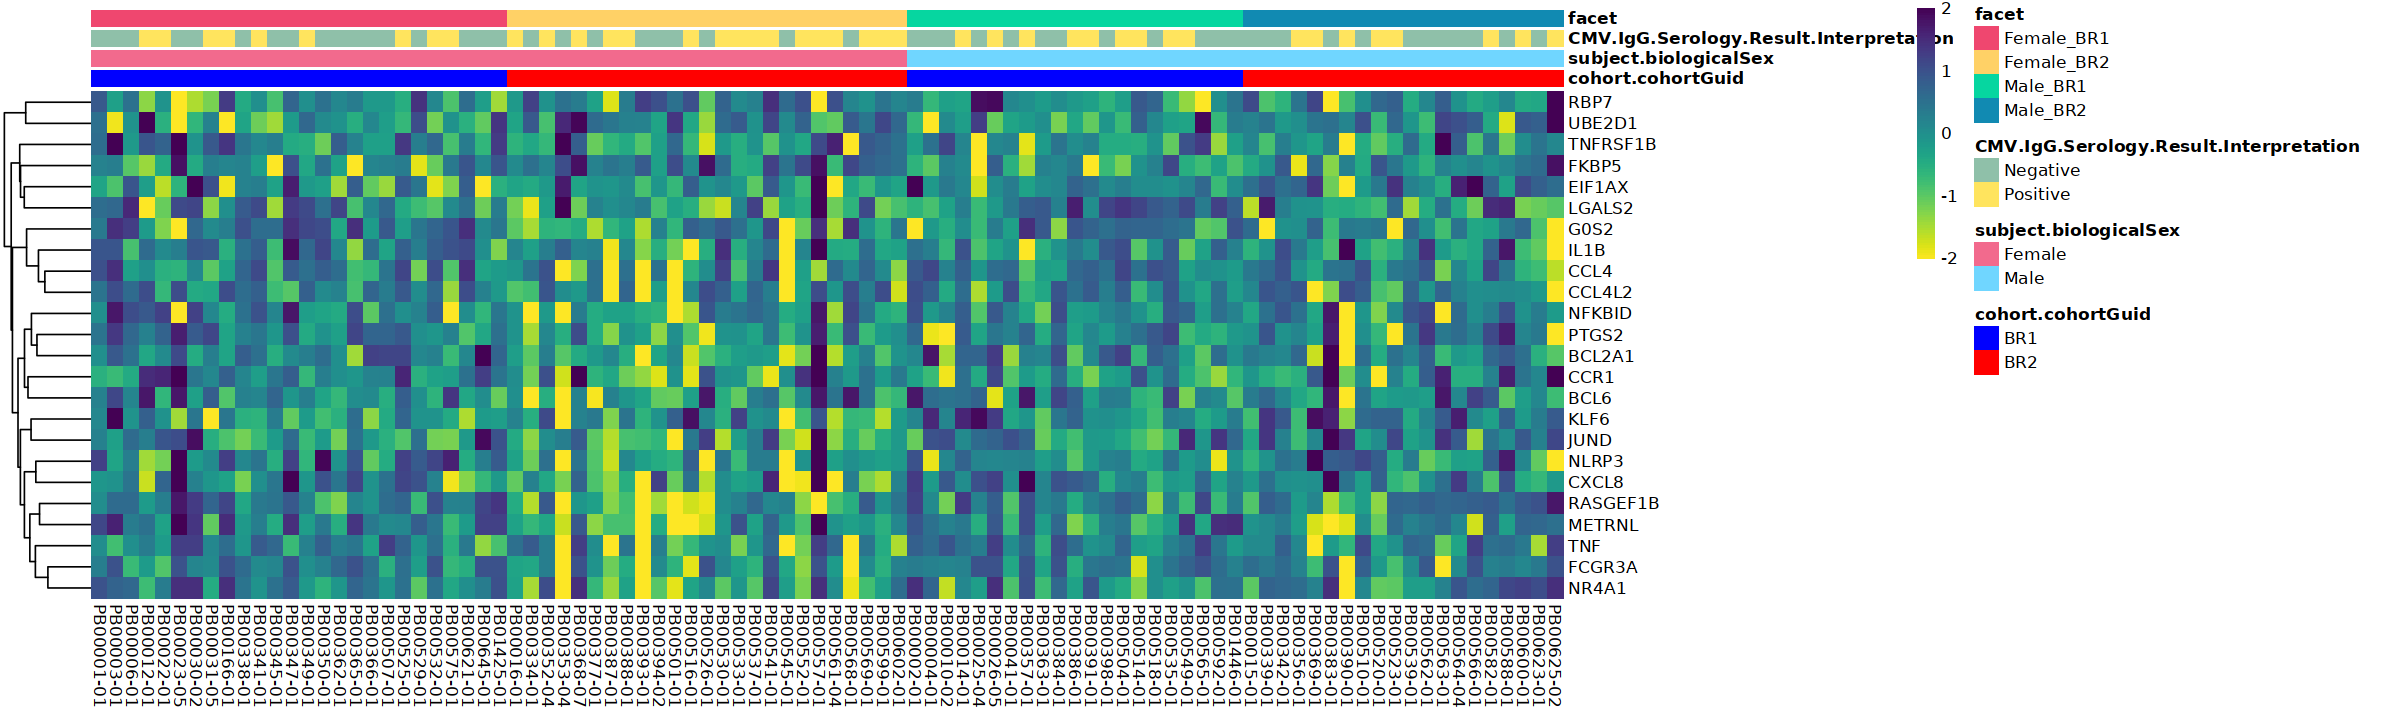

In [82]:
options(repr.plot.width=20, repr.plot.height=6)

breaks_sequence <- seq(2, -2, length.out = 100)

# Get the order of pbmc_sample_id from annotations_subset
sample_order <- annotations_subset$pbmc_sample_id

# Reorder the columns of df_subset
df_subset_ordered <- df_subset[, sample_order]

# Define a color palette
#color_palette <- colorRampPalette(c("blue","blue", "white", "red", "red"))(101)
#color_palette <- colorRampPalette(c("blue", "white", "red"))(101)
color_palette <- colorRampPalette(c("blue", "yellow"))(101)

# Plot the heatmap with reordered columns
pheatmap(df_subset_ordered, 
         clustering_distance_rows = "euclidean", 
         cluster_cols = FALSE, 
         #color = color_palette,
         color= viridis(100),
         scale = "row",  
         annotation_col = annotations_subset[, -1],
         annotation_colors = annotation_colors,
         breaks=breaks_sequence
)


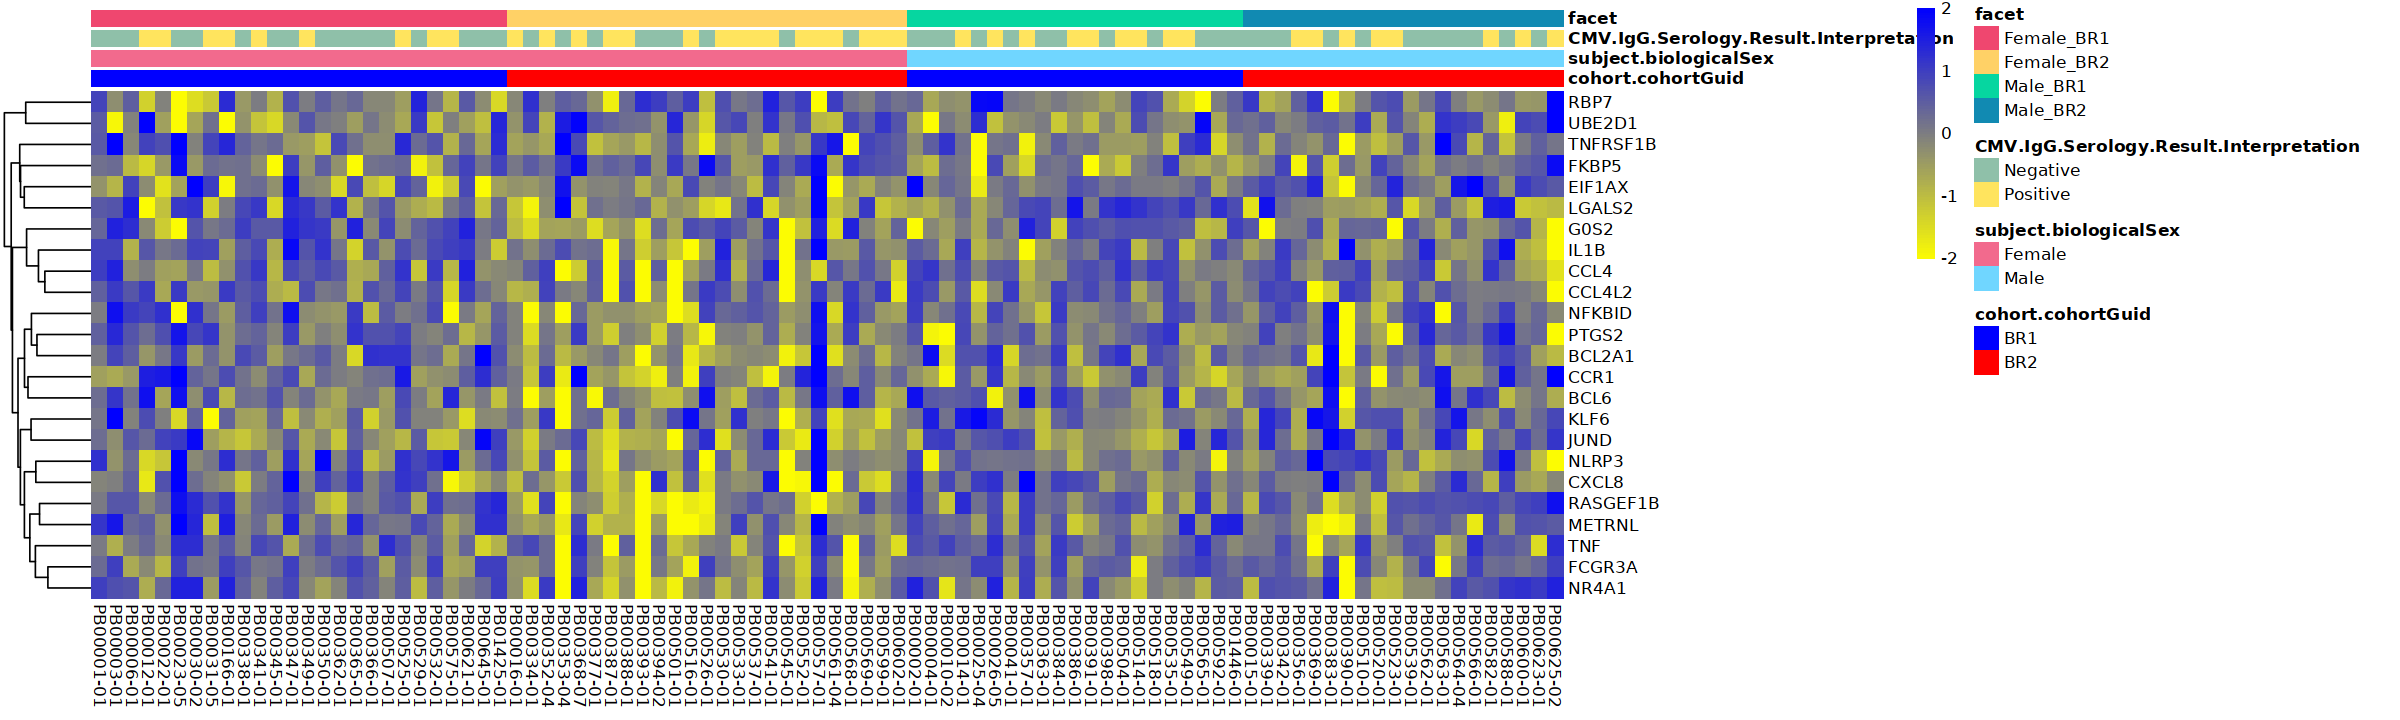

In [76]:
options(repr.plot.width=20, repr.plot.height=6)

breaks_sequence <- seq(2, -2, length.out = 100)

# Get the order of pbmc_sample_id from annotations_subset
sample_order <- annotations_subset$pbmc_sample_id

# Reorder the columns of df_subset
df_subset_ordered <- df_subset[, sample_order]

# Define a color palette
#color_palette <- colorRampPalette(c("blue","blue", "white", "red", "red"))(101)
#color_palette <- colorRampPalette(c("blue", "white", "red"))(101)
color_palette <- colorRampPalette(c("blue", "yellow"))(101)

# Plot the heatmap with reordered columns
pheatmap(df_subset_ordered, 
         clustering_distance_rows = "euclidean", 
         cluster_cols = FALSE, 
         color = color_palette,
         #color= inferno(100),
         scale = "row",  
         annotation_col = annotations_subset[, -1],
         annotation_colors = annotation_colors,
         breaks=breaks_sequence
)


# seperating Female and Male samples in Heatmap

In [33]:
head(male_filt)

,pbmc_sample_id,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid,subject.biologicalSex,facet
,<chr>,<chr>,<chr>,<chr>,<chr>
PB00002-01,PB00002-01,Negative,BR1,Male,Male_BR1
PB00004-01,PB00004-01,Negative,BR1,Male,Male_BR1
PB00010-02,PB00010-02,Negative,BR1,Male,Male_BR1
PB00014-01,PB00014-01,Positive,BR1,Male,Male_BR1
PB00015-01,PB00015-01,Negative,BR2,Male,Male_BR2
PB00025-04,PB00025-04,Negative,BR1,Male,Male_BR1


In [34]:
# # Order columns by BR1 and BR2
# cols <- colnames(df_subset)
# #br1_cols <- cols[grep("^BR1", cols)]
# #br2_cols <- cols[grep("^BR2", cols)]
# #new_order <- c(br1_cols, br2_cols)
# df_ordered <- df_subset[, new_order]

# Subset filtered_meta to match the column names in df_ordered
annotations <- male_filt[male_filt$pbmc_sample_id %in% colnames(df_subset), ]

# Create a subset with only Age, Sex and CMV annotations
annotations_subset <- male_filt[male_filt$pbmc_sample_id %in% colnames(df_subset), c("pbmc_sample_id", "cohort.cohortGuid", "subject.biologicalSex", "CMV.IgG.Serology.Result.Interpretation", "facet")]

# Order annotations in the same order as df_ordered columns
annotations_subset <- annotations_subset[match(colnames(df_subset), annotations_subset$pbmc_sample_id), ]

## Define the specific order for facet
facet_order <- c("Male_BR1", "Male_BR2")

# Convert facet to factor with specific order
annotations_subset$facet <- factor(annotations_subset$facet, levels = facet_order)

# Reorder annotations_subset by facet
annotations_subset <- annotations_subset[order(annotations_subset$facet), ]

# Remove rows with NA values using na.omit()
annotations_subset <- na.omit(annotations_subset)


# Define color palettes for annotations (adjust colors as per your data)
cohort_colors <- setNames(c("blue", "red"), unique(annotations_subset$cohort.cohortGuid))
#sex_colors <- setNames(c("#f26a8d", "#70d6ff"), unique(annotations_subset$subject.biologicalSex))
facet_colors <- setNames(c("#ef476f", "#ffd166"), facet_order)
cmv_colors <- setNames(c( "#8fc0a9", "#ffe45e" ), unique(annotations_subset$CMV.IgG.Serology.Result.Interpretation))

# Combine color mappings into a list
annotation_colors <- list(cohort.cohortGuid = cohort_colors, 
                          #subject.biologicalSex = sex_colors, 
                          facet = facet_colors,
                        CMV.IgG.Serology.Result.Interpretation = cmv_colors )


In [35]:
annotations_subset


,pbmc_sample_id,cohort.cohortGuid,subject.biologicalSex,CMV.IgG.Serology.Result.Interpretation,facet
,<chr>,<chr>,<chr>,<chr>,<fct>
PB00002-01,PB00002-01,BR1,Male,Negative,Male_BR1
PB00004-01,PB00004-01,BR1,Male,Negative,Male_BR1
PB00010-02,PB00010-02,BR1,Male,Negative,Male_BR1
PB00014-01,PB00014-01,BR1,Male,Positive,Male_BR1
PB00025-04,PB00025-04,BR1,Male,Negative,Male_BR1
PB00026-05,PB00026-05,BR1,Male,Positive,Male_BR1
PB00041-01,PB00041-01,BR1,Male,Negative,Male_BR1
PB00357-01,PB00357-01,BR1,Male,Positive,Male_BR1
PB00363-01,PB00363-01,BR1,Male,Negative,Male_BR1


In [197]:
library(readr)
write_csv(annotations_subset, file = "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/IL1B_CD14_mono_Heatmap_metadata_for_groups.csv")


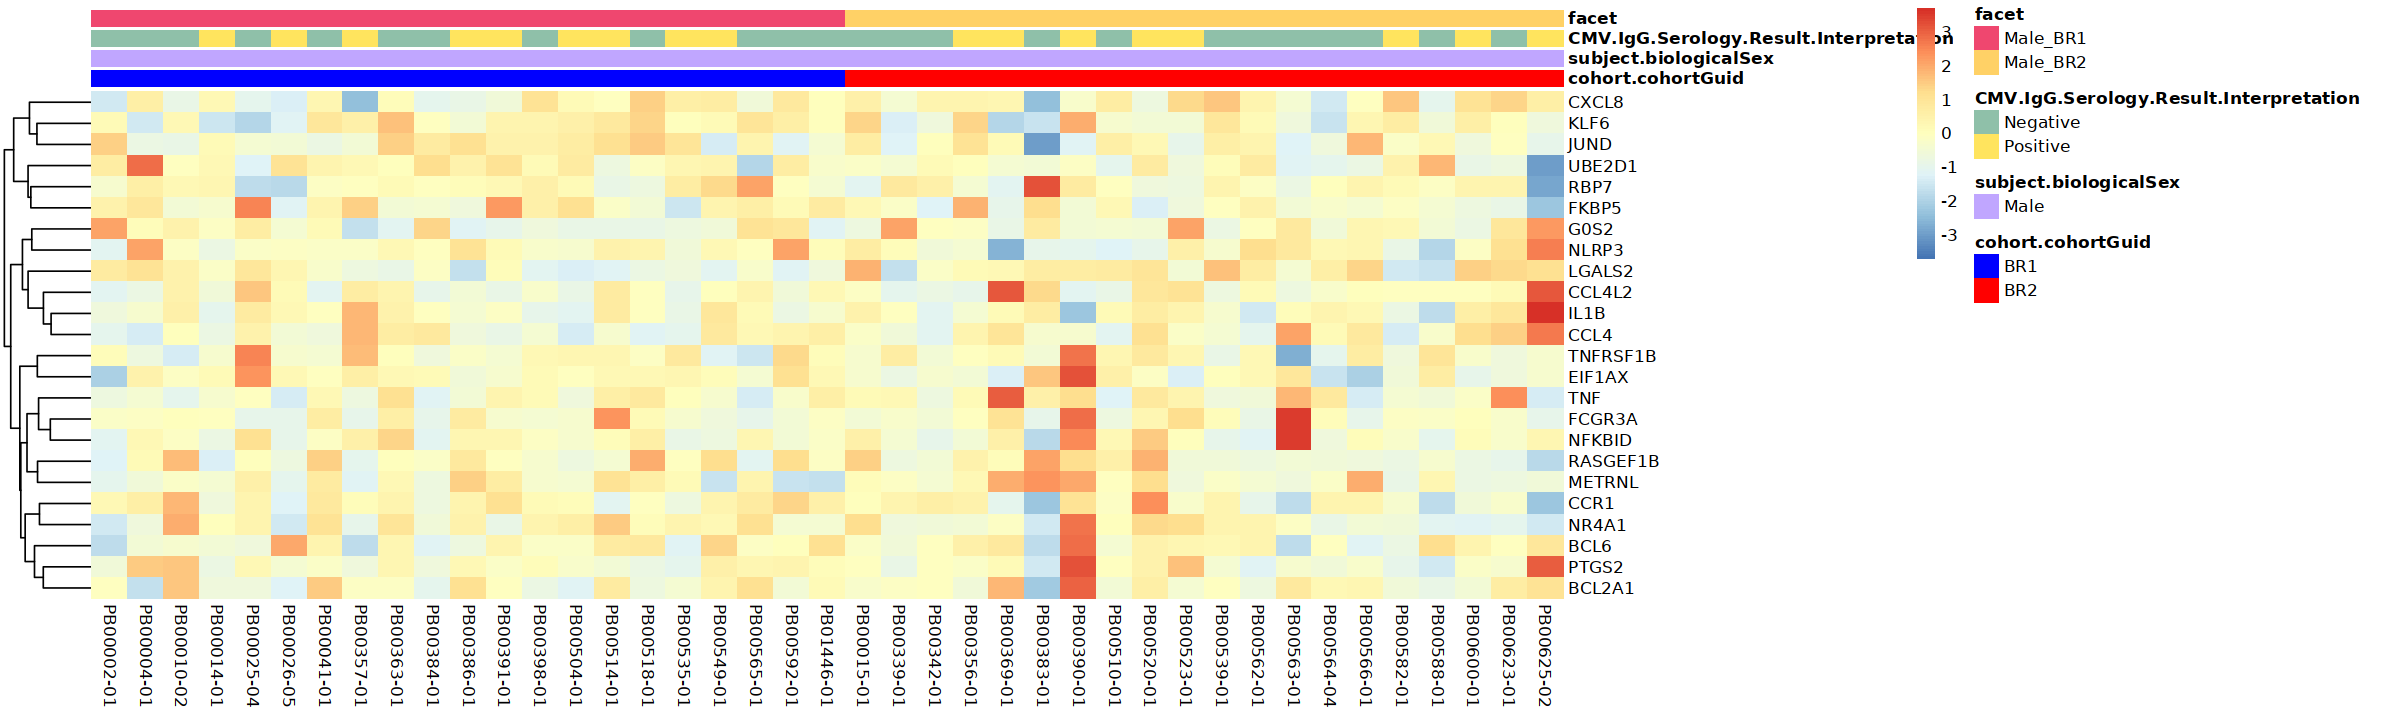

In [40]:
options(repr.plot.width=20, repr.plot.height=6)

# Get the order of pbmc_sample_id from annotations_subset
sample_order <- annotations_subset$pbmc_sample_id

# Reorder the columns of df_subset
df_subset_ordered <- df_subset[, sample_order]

# Define a color palette
color_palette <- colorRampPalette(c("blue","blue", "white", "red", "red"))(101)

# Plot the heatmap with reordered columns
pheatmap(df_subset_ordered, 
         clustering_distance_rows = "euclidean", 
         cluster_cols = FALSE, 
         color = color_palette,
         scale = "row",  
         annotation_col = annotations_subset[, -1],
         annotation_colors = annotation_colors
)


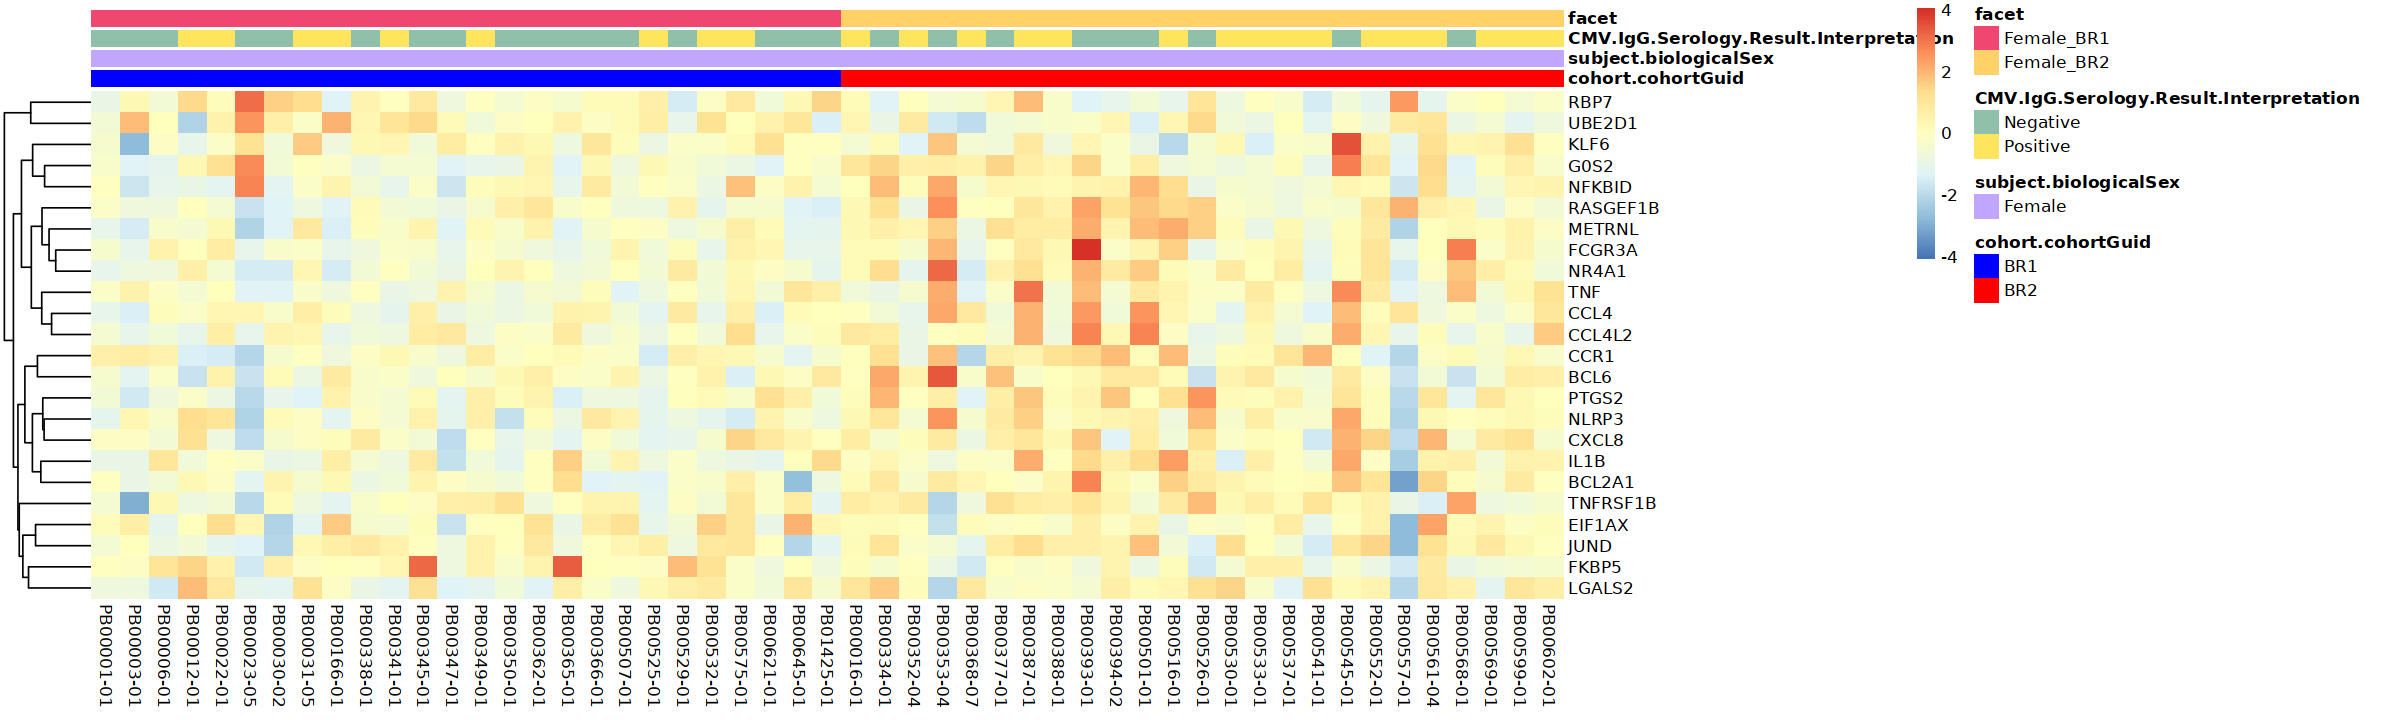

In [31]:
options(repr.plot.width=20, repr.plot.height=6)

# Get the order of pbmc_sample_id from annotations_subset
sample_order <- annotations_subset$pbmc_sample_id

# Reorder the columns of df_subset
df_subset_ordered <- df_subset[, sample_order]

# Define a color palette
color_palette <- colorRampPalette(c("blue","blue", "white", "red", "red"))(101)

# Plot the heatmap with reordered columns
pheatmap(df_subset_ordered, 
         clustering_distance_rows = "euclidean", 
         cluster_cols = FALSE, 
         #color = color_palette,
         scale = "row",  
         annotation_col = annotations_subset[, -1],
         annotation_colors = annotation_colors
)


# Scaling Male and Female matrix seperating and combining them

In [119]:
#IL1B+ Cd14 monocytes
df <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Figure_Notebooks/Intermediate_files/Heatmap_gene_expression/IL1B_CD14_mono_Heatmap_expression_matrix_unscaled.csv")
head(df)

,X,PB00001.01,PB00002.01,PB00003.01,PB00004.01,PB00006.01,PB00010.02,PB00012.01,PB00014.01,PB00015.01,⋯,PB00592.01,PB00599.01,PB00600.01,PB00602.01,PB00621.01,PB00623.01,PB00625.02,PB00645.01,PB01425.01,PB01446.01
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MIR1302-2HG,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
2,FAM138A,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
3,OR4F5,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
4,AL627309.1,0,0,0,0,0,0,0,0,0,⋯,0,0,0.02579722,0,0,0.005713804,0,0,0,0
5,AL627309.3,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
6,AL627309.2,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0


In [120]:
rownames(df) <- df$X
# Assuming df is your data frame and col_name is the name of the column you want to remove
df <- subset(df, select = -X)
colnames(df) <- gsub("\\.", "-", colnames(df))
head(df)

,PB00001-01,PB00002-01,PB00003-01,PB00004-01,PB00006-01,PB00010-02,PB00012-01,PB00014-01,PB00015-01,PB00016-01,⋯,PB00592-01,PB00599-01,PB00600-01,PB00602-01,PB00621-01,PB00623-01,PB00625-02,PB00645-01,PB01425-01,PB01446-01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
AL627309.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.02579722,0,0,0.005713804,0,0,0,0
AL627309.3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
AL627309.2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0


In [121]:
# Subset for genes of interest
genes_of_interest <- c('G0S2','TNF', 'IL1B', 'NR4A1', 'PTGS2', 'BCL2A1', 'BCL6', 'NR4A1', 'METRNL', 'TNFRSF1B',
                                      'FKBP5', 'RBP7', 'UBE2D1', 'FCGR3A', 'CCL4', 'CCL4L2','NFKBID', 'LGALS2', 'CCR1','RASGEF1B', 
                                      'CXCL8', 'NLRP3', 'KLF6', 'EIF1AX', 'JUND') # Replace with any genes
df_subset <- df[rownames(df) %in% genes_of_interest, ]
df_subset

,PB00001-01,PB00002-01,PB00003-01,PB00004-01,PB00006-01,PB00010-02,PB00012-01,PB00014-01,PB00015-01,PB00016-01,⋯,PB00592-01,PB00599-01,PB00600-01,PB00602-01,PB00621-01,PB00623-01,PB00625-02,PB00645-01,PB01425-01,PB01446-01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RBP7,0.6580341,0.8267947,1.0074245,1.1302947,0.77915792,1.00647253,1.3323505,1.0350740,0.5896210,0.9786370,⋯,0.9223510,0.7928386,1.06375205,0.8745921,0.7469651,1.0505479,0.0000000,1.0012400,1.37013869,0.7956115
TNFRSF1B,1.2646416,1.4997217,0.5726240,1.2851622,1.46080800,1.10197095,1.1686409,1.3712373,1.3730211,1.5813378,⋯,1.8054288,1.2157416,1.40579334,1.2816287,1.3333011,1.2994506,1.3842485,1.5909686,1.06614728,1.4928116
FCGR3A,0.2063345,0.1896476,0.0000000,0.2181170,0.51237472,0.24582000,0.3546107,0.2299043,0.1221534,0.4049980,⋯,0.1265516,0.4667233,0.25003737,0.2149161,0.4477868,0.1793682,0.0000000,0.0000000,0.00000000,0.2199266
PTGS2,0.4037394,0.3446376,0.1164149,1.1987074,0.34677196,1.24186075,0.4829994,0.2771626,0.5801127,0.5792147,⋯,0.7612107,0.6212935,0.50814002,0.5533753,0.8654874,0.4398782,1.8283400,0.6938911,0.38231979,0.6158994
G0S2,0.3681518,1.2006851,0.0000000,0.5537455,0.06202377,0.68290521,0.5757327,0.4888096,0.2909091,0.8516766,⋯,0.8309336,0.7079901,0.27933399,0.3638164,0.0000000,0.8105501,1.2431300,0.4686418,0.36349363,0.1589934
NLRP3,0.2194822,0.2702370,0.5425574,0.8469841,0.40963067,0.44083116,0.7558058,0.3235502,0.5995581,0.5352163,⋯,0.8466884,0.5237548,0.44509940,0.4961413,0.5655765,0.6804465,0.9365257,0.4126855,0.29654733,0.4815437
IL1B,0.6693585,0.8664402,0.6734207,0.9965455,1.55288792,1.46812882,0.8223424,0.6474077,1.4278196,1.0405723,⋯,0.7570703,1.3217057,1.49715970,1.2916855,0.5953855,1.6441042,3.0959512,1.1244188,1.74867104,1.0121349
CCR1,0.6832188,0.6309584,0.7315364,0.7241851,0.65655656,1.03271548,0.1646967,0.4112466,0.5779835,0.5309352,⋯,0.9057002,0.6002498,0.43270577,0.4550728,0.4235760,0.5106632,0.0000000,0.2232902,0.42976890,0.7072403
BCL6,0.2864497,0.0000000,0.1164149,0.2293325,0.30909220,0.25190232,0.0000000,0.2310151,0.2772842,0.3401682,⋯,0.3184354,0.5080019,0.38466344,0.4732558,0.4159875,0.3119816,0.4820303,0.3280479,0.54754719,0.5206769


In [113]:
colnames(meta_data)
unique(meta_data$sample.visitName)


[1] "X.1"                                   
 [2] "X"                                     
 [3] "lastUpdated"                           
 [4] "sample.id"                             
 [5] "sample.bridgingControl"                
 [6] "sample.sampleKitGuid"                  
 [7] "sample.visitName"                      
 [8] "sample.visitDetails"                   
 [9] "sample.drawDate"                       
[10] "sample.daysSinceFirstVisit"            
[11] "file.id"                               
[12] "file.name"                             
[13] "file.batchID"                          
[14] "file.panel"                            
[15] "file.pool"                             
[16] "file.fileType"                         
[17] "file.majorVersion"                     
[18] "subject.id"                            
[19] "subject.biologicalSex"                 
[20] "subject.birthYear"                     
[21] "CMV.IgG.Serology.Result.Interpretation"
[22] "subject.ethnicity"                     
[23] "subject.partnerCode"                   
[24] "subject.race"                          
[25] "subject.subjectGuid"                   
[26] "cohort.cohortGuid"                     
[27] "sample.diseaseStatesRecordedAtVisit"   
[28] "pbmc_sample_id"                        
[29] "Sample_ID"                             
[30] "Sample_Draw_date"                      
[31] "Covid_Dose_1"                          
[32] "Covid_Dose_2"                          
[33] "Covid_exlcusion"                       
[34] "BMI"                                   
[35] "file.name.downloaded"                  
[36] "file.path"

[1] "Flu Year 1 Day 0"

In [122]:
meta_data <- meta_data %>% filter(sample.visitName == "Flu Year 1 Day 0")
dim(meta_data)

[1] 92 36

In [123]:
# Filter sample IDs for male and female
male_samples <- meta_data$pbmc_sample_id[meta_data$subject.biologicalSex == "Male"]
female_samples <- meta_data$pbmc_sample_id[meta_data$subject.biologicalSex == "Female"]

male_samples
female_samples

[1] "PB00002-01" "PB00004-01" "PB00010-02" "PB00014-01" "PB00015-01"
 [6] "PB00025-04" "PB00026-05" "PB00041-01" "PB00339-01" "PB00342-01"
[11] "PB00356-01" "PB00357-01" "PB00363-01" "PB00369-01" "PB00383-01"
[16] "PB00384-01" "PB00386-01" "PB00390-01" "PB00391-01" "PB00398-01"
[21] "PB00504-01" "PB00510-01" "PB00514-01" "PB00518-01" "PB00520-01"
[26] "PB00523-01" "PB00535-01" "PB00539-01" "PB00549-01" "PB00562-01"
[31] "PB00563-01" "PB00564-04" "PB00565-01" "PB00566-01" "PB00582-01"
[36] "PB00588-01" "PB00592-01" "PB00600-01" "PB00623-01" "PB00625-02"
[41] "PB01446-01"

[1] "PB00001-01" "PB00003-01" "PB00006-01" "PB00012-01" "PB00016-01"
 [6] "PB00022-01" "PB00023-05" "PB00030-02" "PB00031-05" "PB00166-01"
[11] "PB00334-01" "PB00338-01" "PB00341-01" "PB00345-01" "PB00347-01"
[16] "PB00349-01" "PB00350-01" "PB00352-04" "PB00353-04" "PB00362-01"
[21] "PB00365-01" "PB00366-01" "PB00368-07" "PB00377-01" "PB00387-01"
[26] "PB00388-01" "PB00393-01" "PB00394-02" "PB00501-01" "PB00507-01"
[31] "PB00516-01" "PB00525-01" "PB00526-01" "PB00529-01" "PB00530-01"
[36] "PB00532-01" "PB00533-01" "PB00537-01" "PB00541-01" "PB00545-01"
[41] "PB00552-01" "PB00557-01" "PB00561-04" "PB00568-01" "PB00569-01"
[46] "PB00575-01" "PB00599-01" "PB00602-01" "PB00621-01" "PB00645-01"
[51] "PB01425-01"

In [124]:
# subsetting for male and female matrix seperatley

# Subset for male samples
male_expr_matrix <- df_subset[, colnames(df_subset) %in% male_samples]

# Subset for female samples
female_expr_matrix <- df_subset[, colnames(df_subset) %in% female_samples]


head(male_expr_matrix)
head(female_expr_matrix)

,PB00002-01,PB00004-01,PB00010-02,PB00014-01,PB00015-01,PB00025-04,PB00026-05,PB00041-01,PB00339-01,PB00342-01,⋯,PB00564-04,PB00565-01,PB00566-01,PB00582-01,PB00588-01,PB00592-01,PB00600-01,PB00623-01,PB00625-02,PB01446-01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RBP7,0.8267947,1.1302947,1.0064725,1.0350740,0.5896210,0.3544166,0.3448859,0.8942281,1.1954751,1.1158531,⋯,0.9325202,1.6054910,1.0603480,1.0014938,0.8883185,0.9223510,1.0637521,1.0505479,0.0000000,0.7956115
TNFRSF1B,1.4997217,1.2851622,1.1019709,1.3712373,1.3730211,2.1443276,1.3852600,1.3664685,1.6482757,1.3365486,⋯,1.2037566,1.0664299,1.6556200,1.3036781,1.7239897,1.8054288,1.4057933,1.2994506,1.3842485,1.4928116
FCGR3A,0.1896476,0.2181170,0.2458200,0.2299043,0.1221534,0.0000000,0.0000000,0.4182871,0.1807439,0.1101693,⋯,0.2705942,0.0000000,0.0000000,0.2136057,0.1990894,0.1265516,0.2500374,0.1793682,0.0000000,0.2199266
PTGS2,0.3446376,1.1987074,1.2418607,0.2771626,0.5801127,0.6774327,0.4287209,0.4940286,0.2498422,0.5707037,⋯,0.3656296,0.7062789,0.4822642,0.1963549,0.0000000,0.7612107,0.5081400,0.4398782,1.8283400,0.6158994
G0S2,1.2006851,0.5537455,0.6829052,0.4888096,0.2909091,0.7494288,0.3868000,0.5960241,1.2082172,0.5164989,⋯,0.3449504,0.8670597,0.6377630,0.6147772,0.3740602,0.8309336,0.2793340,0.8105501,1.2431300,0.1589934
NLRP3,0.2702370,0.8469841,0.4408312,0.3235502,0.5995581,0.4310067,0.4408022,0.4309145,0.4824203,0.3689207,⋯,0.5204434,0.4574875,0.5319425,0.3153366,0.1288485,0.8466884,0.4450994,0.6804465,0.9365257,0.4815437


,PB00001-01,PB00003-01,PB00006-01,PB00012-01,PB00016-01,PB00022-01,PB00023-05,PB00030-02,PB00031-05,PB00166-01,⋯,PB00557-01,PB00561-04,PB00568-01,PB00569-01,PB00575-01,PB00599-01,PB00602-01,PB00621-01,PB00645-01,PB01425-01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RBP7,0.6580341,1.0074245,0.77915792,1.3323505,0.9786370,0.9475646,1.8184386,1.3935178,1.3006350,0.5300261,⋯,1.641556,0.6156453,0.8736585,0.9325053,1.1923727,0.7928386,0.8745921,0.7469651,1.0012400,1.3701387
TNFRSF1B,1.2646416,0.5726240,1.46080800,1.1686409,1.5813378,1.2248489,0.8493444,1.4379935,1.1785630,1.0501321,⋯,1.125449,0.9848584,2.0054316,1.1801388,1.6517887,1.2157416,1.2816287,1.3333011,1.5909686,1.0661473
FCGR3A,0.2063345,0.0000000,0.51237472,0.3546107,0.4049980,0.5767768,0.0000000,0.2434325,0.2633534,0.0000000,⋯,0.000000,0.3552877,1.2850123,0.2736850,0.5000282,0.4667233,0.2149161,0.4477868,0.0000000,0.0000000
PTGS2,0.4037394,0.1164149,0.34677196,0.4829994,0.5792147,0.3112363,0.0000000,0.2770237,0.1796513,0.6757613,⋯,0.000000,0.7995938,0.2249071,0.7983699,0.4707843,0.6212935,0.5533753,0.8654874,0.6938911,0.3823198
G0S2,0.3681518,0.0000000,0.06202377,0.5757327,0.8516766,0.9365560,1.4994712,0.2731865,0.4740285,0.4056449,⋯,0.000000,1.0222672,0.0000000,0.5308787,0.1703813,0.7079901,0.3638164,0.0000000,0.4686418,0.3634936
NLRP3,0.2194822,0.5425574,0.40963067,0.7558058,0.5352163,0.7012403,0.0000000,0.5072406,0.4466814,0.2162837,⋯,0.000000,0.5194297,0.4627067,0.4998174,0.1406341,0.5237548,0.4961413,0.5655765,0.4126855,0.2965473


In [125]:
# Scaliong each individual MvsF matrix individually

###### Male
# Remove rows with zero standard deviation
male_expr_matrix <- male_expr_matrix[apply(male_expr_matrix, 1, sd) != 0, ]
# Transpose the data frame, scale it column-wise, and then transpose it back
scaled_matrix_male <- t(scale(t(male_expr_matrix)))
# Check the head of the scaled matrix
head(scaled_matrix_male)

###### Female
# Remove rows with zero standard deviation
female_expr_matrix <- female_expr_matrix[apply(female_expr_matrix, 1, sd) != 0, ]
# Transpose the data frame, scale it column-wise, and then transpose it back
scaled_matrix_female <- t(scale(t(female_expr_matrix)))
# Check the head of the scaled matrix
head(scaled_matrix_female)


,PB00002-01,PB00004-01,PB00010-02,PB00014-01,PB00015-01,PB00025-04,PB00026-05,PB00041-01,PB00339-01,PB00342-01,⋯,PB00564-04,PB00565-01,PB00566-01,PB00582-01,PB00588-01,PB00592-01,PB00600-01,PB00623-01,PB00625-02,PB01446-01
RBP7,-0.3140108,0.61544240,0.23624341,0.32383396,-1.040342902,-1.7606443,-1.7898317,-0.1074993,0.81505416,0.57121588,⋯,0.009768228,2.07070668,0.4012342,0.2209962,-0.1255972,-0.02137431,0.4116590,0.3712218,-2.8460269,-0.40950755
TNFRSF1B,0.1235104,-0.68386017,-1.37319433,-0.35996613,-0.353254006,2.5491119,-0.3071999,-0.3779109,0.68250774,-0.49049686,⋯,-0.990182723,-1.50693257,0.7101436,-0.6141860,0.9674136,1.27386251,-0.2299345,-0.6300938,-0.3110060,0.09750846
FCGR3A,-0.2055393,-0.09513034,0.01230626,-0.04941739,-0.467292352,-0.9410226,-0.9410226,0.6811609,-0.24006904,-0.51376845,⋯,0.108384725,-0.94102264,-0.9410226,-0.1126261,-0.1689225,-0.45023538,0.0286619,-0.2454042,-0.9410226,-0.08811247
PTGS2,-0.5835990,1.50954450,1.61530409,-0.74896589,-0.006499574,0.2320111,-0.3775287,-0.2174735,-0.81592232,-0.02955898,⋯,-0.532152138,0.30270693,-0.2463054,-0.9470084,-1.4282324,0.43733313,-0.1828893,-0.3501844,3.0526400,0.08120592
G0S2,2.1128567,0.08675022,0.49125682,-0.11661809,-0.736409350,0.6995976,-0.4360951,0.2191596,2.13644601,-0.02989982,⋯,-0.567160909,1.06799778,0.3498790,0.2778912,-0.4759940,0.95485690,-0.7726607,0.8910193,2.2457869,-1.14954731
NLRP3,-1.0911115,2.10532341,-0.14564856,-0.79564048,0.734044316,-0.2000977,-0.1458088,-0.2006082,0.08484608,-0.54418936,⋯,0.295576882,-0.05333591,0.3593069,-0.8411615,-1.8747117,2.10368410,-0.1219932,1.1823421,2.6015786,0.07998737


,PB00001-01,PB00003-01,PB00006-01,PB00012-01,PB00016-01,PB00022-01,PB00023-05,PB00030-02,PB00031-05,PB00166-01,⋯,PB00557-01,PB00561-04,PB00568-01,PB00569-01,PB00575-01,PB00599-01,PB00602-01,PB00621-01,PB00645-01,PB01425-01
RBP7,-0.9089388,0.2910802,-0.4929261,1.40707358,0.1922065,0.08548472,3.0765960,1.6171592,1.29814329,-1.3485961,⋯,2.4690735,-1.05452775,-0.16835372,0.03376194,0.9263049,-0.4459381,-0.16514713,-0.6034959,0.26983900,1.5368613
TNFRSF1B,-0.4193979,-2.9700674,0.3036412,-0.77324134,0.7478955,-0.56606727,-1.9501186,0.2195505,-0.73667014,-1.2100464,⋯,-0.9324416,-1.45063503,2.31103929,-0.73086201,1.0075664,-0.5996355,-0.35678586,-0.1663294,0.78339310,-1.1510170
FCGR3A,-0.3774269,-0.9976888,0.5425602,0.06830596,0.2197751,0.73615923,-0.9976888,-0.2659068,-0.20602253,-0.9976888,⋯,-0.9976888,0.07034105,2.86518517,-0.17496451,0.5054455,0.4053277,-0.35162975,0.3484026,-0.99768880,-0.9976888
PTGS2,-0.5048449,-1.5842052,-0.7188481,-0.20709748,0.1543441,-0.85234095,-2.0215285,-0.9808638,-1.34665220,0.5170302,⋯,-2.0215285,0.98221833,-1.17664469,0.97762057,-0.2529846,0.3124168,0.05727619,1.2297535,0.58513629,-0.5853095
G0S2,-0.3022838,-1.2910641,-1.1244810,0.25523616,0.9963650,1.22433372,2.7362087,-0.5573411,-0.01792047,-0.2015848,⋯,-1.2910641,1.45453642,-1.29106415,0.13476756,-0.8334549,0.6104526,-0.31392774,-1.2910641,-0.03238801,-0.3147946
NLRP3,-1.1301868,0.3526689,-0.2574405,1.33143971,0.3189744,1.08099401,-2.1375697,0.1905711,-0.08738428,-1.1448672,⋯,-2.1375697,0.24651689,-0.01383105,0.15650019,-1.4920853,0.2663683,0.13962737,0.4583220,-0.24341943,-0.7764721


In [110]:
# Make sure both matrices have the same row names (gene names)
# rownames(scaled_matrix_male) <- rownames(df)
# rownames(scaled_matrix_female) <- rownames(df)

head(scaled_matrix_male)
head(scaled_matrix_female)
dim(scaled_matrix_male)
dim(scaled_matrix_female)

,PB00002-01,PB00004-01,PB00010-02,PB00014-01,PB00015-01,PB00025-04,PB00026-05,PB00041-01,PB00339-01,PB00342-01,⋯,PB00564-04,PB00565-01,PB00566-01,PB00582-01,PB00588-01,PB00592-01,PB00600-01,PB00623-01,PB00625-02,PB01446-01
4,-0.3679089,-0.3679089,-0.3679089,-0.36790894,-0.3679089,3.3047171,3.1032049,-0.3679089,-0.3679089,-0.36790894,⋯,-0.3679089,-0.3679089,-0.3679089,0.3734395,-0.3679089,-0.3679089,0.5510520,-0.16436904,-0.3679089,-0.3679089
5,-0.1561738,-0.1561738,-0.1561738,-0.15617376,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.15617376,⋯,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.15617376,-0.1561738,-0.1561738
7,-0.1561738,-0.1561738,-0.1561738,-0.15617376,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.15617376,⋯,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.15617376,-0.1561738,-0.1561738
13,1.5545020,0.2915227,-0.7285947,0.04363092,0.9288338,-0.7285947,-0.7285947,-0.7285947,-0.3361842,-0.05004079,⋯,-0.7285947,-0.7285947,-0.7285947,-0.7285947,-0.7285947,-0.7285947,1.3777376,-0.50245486,-0.7285947,1.7306605
14,-0.1561738,-0.1561738,-0.1561738,-0.15617376,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.15617376,⋯,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.1561738,-0.15617376,-0.1561738,-0.1561738
15,-0.3187853,-0.3187853,1.4052346,-0.31878530,-0.3187853,-0.3187853,-0.3187853,-0.3187853,-0.3187853,-0.21573273,⋯,-0.3187853,-0.3187853,-0.3187853,0.1402956,5.7525200,-0.3187853,-0.3187853,0.04601495,-0.3187853,-0.3187853


,PB00001-01,PB00003-01,PB00006-01,PB00012-01,PB00016-01,PB00022-01,PB00023-05,PB00030-02,PB00031-05,PB00166-01,⋯,PB00557-01,PB00561-04,PB00568-01,PB00569-01,PB00575-01,PB00599-01,PB00602-01,PB00621-01,PB00645-01,PB01425-01
4,-0.3638293,-0.3638293,-0.3638293,-0.36382935,-0.363829348,-0.3638293,-0.3638293,-0.3638293,-0.3638293,-0.3638293,⋯,-0.3638293,-0.3638293,-0.3638293,-0.3638293,-0.36382935,-0.3638293,-0.3638293,-0.3638293,-0.3638293,-0.3638293
13,-0.4183905,-0.6798850,-0.6798850,-0.67988500,0.006261805,-0.6798850,-0.6798850,-0.6798850,-0.6798850,-0.6798850,⋯,-0.6798850,-0.6798850,-0.6798850,0.4922603,-0.67988500,0.5320073,-0.6798850,-0.6798850,-0.6798850,-0.6798850
14,-0.2036188,-0.2036188,-0.2036188,6.49154582,-0.203618802,-0.2036188,-0.2036188,-0.2036188,-0.2036188,-0.2036188,⋯,-0.2036188,-0.2036188,-0.2036188,-0.2036188,-0.20361880,-0.2036188,-0.2036188,-0.2036188,-0.2036188,-0.2036188
15,1.6197710,-0.5170853,-0.5170853,-0.51708528,-0.517085277,-0.5170853,-0.5170853,-0.5170853,1.2828858,-0.5170853,⋯,-0.5170853,-0.5170853,-0.5170853,-0.2949555,-0.51708528,-0.5170853,-0.5170853,-0.5170853,-0.5170853,-0.5170853
16,-0.4632643,-0.4632643,-0.4632643,-0.46326430,0.253450914,-0.4632643,-0.4632643,-0.4632643,-0.4632643,-0.4632643,⋯,-0.4632643,3.2403822,-0.4632643,-0.1598568,-0.46326430,0.2849720,0.1175752,-0.4632643,-0.4632643,-0.4632643
22,-0.2278086,-1.0623503,1.1130215,-0.03581146,0.465420977,-0.5716050,-1.0623503,0.4128098,1.1947945,0.1745806,⋯,5.4374658,0.3649021,0.6652450,-0.3481360,-0.07002632,-0.6580365,-0.2111943,-1.0623503,-0.2299774,-0.6537578


[1] 17252    41

[1] 16597    51

In [126]:
combined_expr_matrix <- cbind(scaled_matrix_male, scaled_matrix_female)

In [127]:
combined_expr_matrix

,PB00002-01,PB00004-01,PB00010-02,PB00014-01,PB00015-01,PB00025-04,PB00026-05,PB00041-01,PB00339-01,PB00342-01,⋯,PB00557-01,PB00561-04,PB00568-01,PB00569-01,PB00575-01,PB00599-01,PB00602-01,PB00621-01,PB00645-01,PB01425-01
RBP7,-0.31401075,0.61544240,0.23624341,0.323833964,-1.040342902,-1.76064430,-1.7898317,-0.107499302,0.81505416,0.571215878,⋯,2.4690735,-1.05452775,-0.16835372,0.03376194,0.92630485,-0.44593814,-0.16514713,-0.60349588,0.26983900,1.53686132
TNFRSF1B,0.12351044,-0.68386017,-1.37319433,-0.359966129,-0.353254006,2.54911193,-0.3071999,-0.377910944,0.68250774,-0.490496860,⋯,-0.9324416,-1.45063503,2.31103929,-0.73086201,1.00756637,-0.59963552,-0.35678586,-0.16632940,0.78339310,-1.15101698
FCGR3A,-0.20553931,-0.09513034,0.01230626,-0.049417393,-0.467292352,-0.94102264,-0.9410226,0.681160867,-0.24006904,-0.513768454,⋯,-0.9976888,0.07034105,2.86518517,-0.17496451,0.50544547,0.40532767,-0.35162975,0.34840260,-0.99768880,-0.99768880
PTGS2,-0.58359905,1.50954450,1.61530409,-0.748965886,-0.006499574,0.23201110,-0.3775287,-0.217473452,-0.81592232,-0.029558981,⋯,-2.0215285,0.98221833,-1.17664469,0.97762057,-0.25298458,0.31241676,0.05727619,1.22975352,0.58513629,-0.58530952
G0S2,2.11285672,0.08675022,0.49125682,-0.116618092,-0.736409350,0.69959759,-0.4360951,0.219159596,2.13644601,-0.029899819,⋯,-1.2910641,1.45453642,-1.29106415,0.13476756,-0.83345491,0.61045258,-0.31392774,-1.29106415,-0.03238801,-0.31479459
NLRP3,-1.09111152,2.10532341,-0.14564856,-0.795640479,0.734044316,-0.20009774,-0.1458088,-0.200608206,0.08484608,-0.544189358,⋯,-2.1375697,0.24651689,-0.01383105,0.15650019,-1.49208529,0.26636827,0.13962737,0.45832204,-0.24341943,-0.77647211
IL1B,-0.59352415,-0.34317763,0.56423482,-1.014982711,0.486672415,0.74799231,0.2693149,-0.002113083,-0.02730002,-1.069745809,⋯,-2.3429817,0.56376845,0.59652820,-0.53053365,-0.95126443,0.49527104,0.43080513,-1.06444108,0.07161386,1.41214342
CCR1,0.24948235,0.61963753,1.84465259,-0.622879955,0.039146400,0.37239667,-1.2385191,0.859390663,0.42629530,0.647487863,⋯,-2.0605695,-0.15187860,0.22278054,-0.38879438,0.29457550,0.28929441,-0.27904621,-0.40235023,-1.18643070,-0.37810605
BCL6,-1.73436618,-0.47576347,-0.35189750,-0.466528989,-0.212598842,-0.66031885,2.0693335,0.442416441,-0.59094253,-0.028924724,⋯,-1.7444469,-0.52305083,-1.74444694,-0.55987063,-1.38951989,0.76626287,0.59453599,0.31149751,-0.12312813,0.96170825
CXCL8,-1.42050284,0.64558423,-0.85966782,0.280322369,0.561458112,-1.02733202,-1.3246858,0.339767484,-0.38004156,0.370616774,⋯,-1.9021700,2.01243148,-0.43273249,0.88879446,1.51173054,1.15565639,-0.36154554,0.93249422,0.42782148,-0.04202317


In [132]:
# # Order columns by BR1 and BR2
# cols <- colnames(df_subset)
# #br1_cols <- cols[grep("^BR1", cols)]
# #br2_cols <- cols[grep("^BR2", cols)]
# #new_order <- c(br1_cols, br2_cols)
# df_ordered <- df_subset[, new_order]

# Subset filtered_meta to match the column names in df_ordered
annotations <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(combined_expr_matrix), ]

# Create a subset with only Age, Sex and CMV annotations
annotations_subset <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(combined_expr_matrix), c("pbmc_sample_id", "cohort.cohortGuid", "subject.biologicalSex", "CMV.IgG.Serology.Result.Interpretation", "facet")]

# Order annotations in the same order as df_ordered columns
annotations_subset <- annotations_subset[match(colnames(combined_expr_matrix), annotations_subset$pbmc_sample_id), ]

## Define the specific order for facet
facet_order <- c("Female_BR1", "Female_BR2","Male_BR1", "Male_BR2")

# Convert facet to factor with specific order
annotations_subset$facet <- factor(annotations_subset$facet, levels = facet_order)

# Reorder annotations_subset by facet
annotations_subset <- annotations_subset[order(annotations_subset$facet), ]

# Remove rows with NA values using na.omit()
annotations_subset <- na.omit(annotations_subset)


# Define color palettes for annotations (adjust colors as per your data)
cohort_colors <- setNames(c("blue", "red"), unique(annotations_subset$cohort.cohortGuid))
#sex_colors <- setNames(c("#f26a8d", "#70d6ff"), unique(annotations_subset$subject.biologicalSex))
facet_colors <- setNames(c("#ef476f", "#ffd166", "#06d6a0", "#118ab2"), facet_order)
cmv_colors <- setNames(c( "#8fc0a9", "#ffe45e" ), unique(annotations_subset$CMV.IgG.Serology.Result.Interpretation))

# Combine color mappings into a list
annotation_colors <- list(cohort.cohortGuid = cohort_colors, 
                          #subject.biologicalSex = sex_colors, 
                          facet = facet_colors,
                        CMV.IgG.Serology.Result.Interpretation = cmv_colors )


In [133]:
annotations_subset


,pbmc_sample_id,cohort.cohortGuid,subject.biologicalSex,CMV.IgG.Serology.Result.Interpretation,facet
,<chr>,<chr>,<chr>,<chr>,<fct>
PB00001-01,PB00001-01,BR1,Female,Negative,Female_BR1
PB00003-01,PB00003-01,BR1,Female,Negative,Female_BR1
PB00006-01,PB00006-01,BR1,Female,Negative,Female_BR1
PB00012-01,PB00012-01,BR1,Female,Positive,Female_BR1
PB00022-01,PB00022-01,BR1,Female,Positive,Female_BR1
PB00023-05,PB00023-05,BR1,Female,Negative,Female_BR1
PB00030-02,PB00030-02,BR1,Female,Negative,Female_BR1
PB00031-05,PB00031-05,BR1,Female,Positive,Female_BR1
PB00166-01,PB00166-01,BR1,Female,Positive,Female_BR1


In [197]:
library(readr)
write_csv(annotations_subset, file = "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/IL1B_CD14_mono_Heatmap_metadata_for_groups.csv")


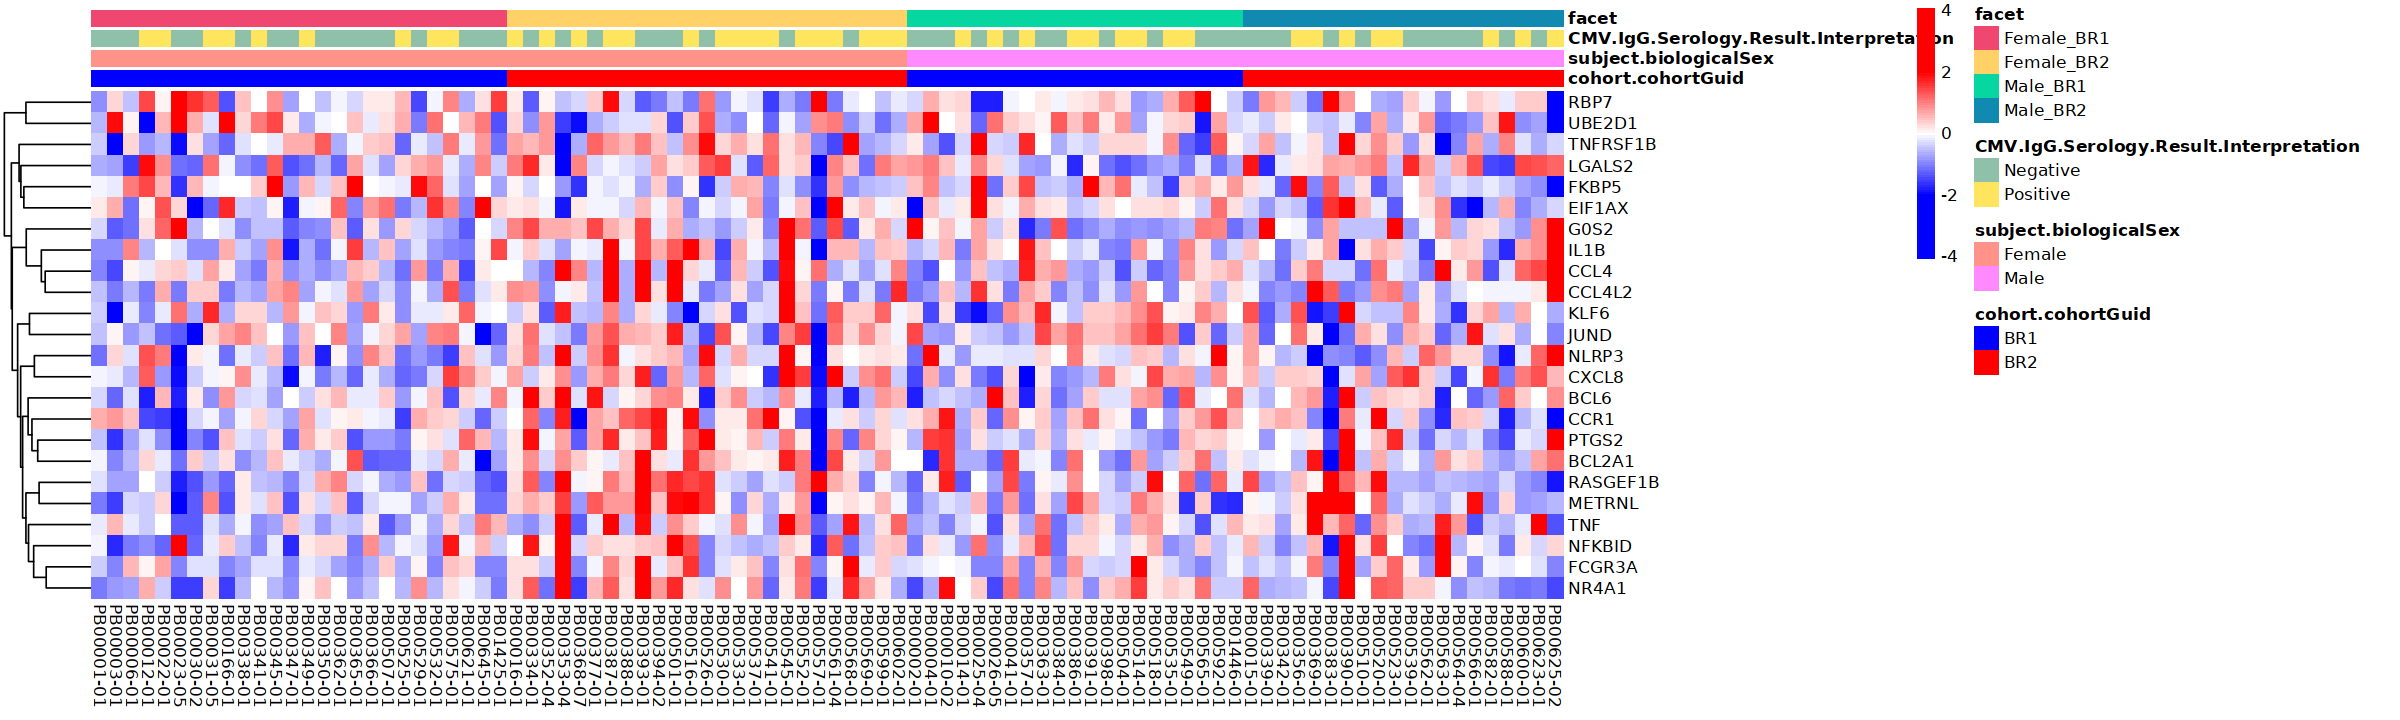

In [137]:
options(repr.plot.width=20, repr.plot.height=6)

# Get the order of pbmc_sample_id from annotations_subset
sample_order <- annotations_subset$pbmc_sample_id

# Reorder the columns of df_subset
df_subset_ordered <- combined_expr_matrix[, sample_order]

# Define a color palette
color_palette <- colorRampPalette(c("blue","blue", "white", "red", "red"))(101)

# Plot the heatmap with reordered columns
pheatmap(df_subset_ordered, 
         clustering_distance_rows = "euclidean", 
         cluster_cols = FALSE, 
         color = color_palette,
         scale = "row",  
         annotation_col = annotations_subset[, -1],
         annotation_colors = annotation_colors
)
